# [Stardist](https://github.com/stardist/stardist)

2023-10-21 23:35:46.549496: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-21 23:35:47.947283: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found model '2D_versatile_he' for 'StarDist2D'.


2023-10-21 23:36:45.529141: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30975 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:1b:00.0, compute capability: 7.0


Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


2023-10-21 23:36:49.200666: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8800


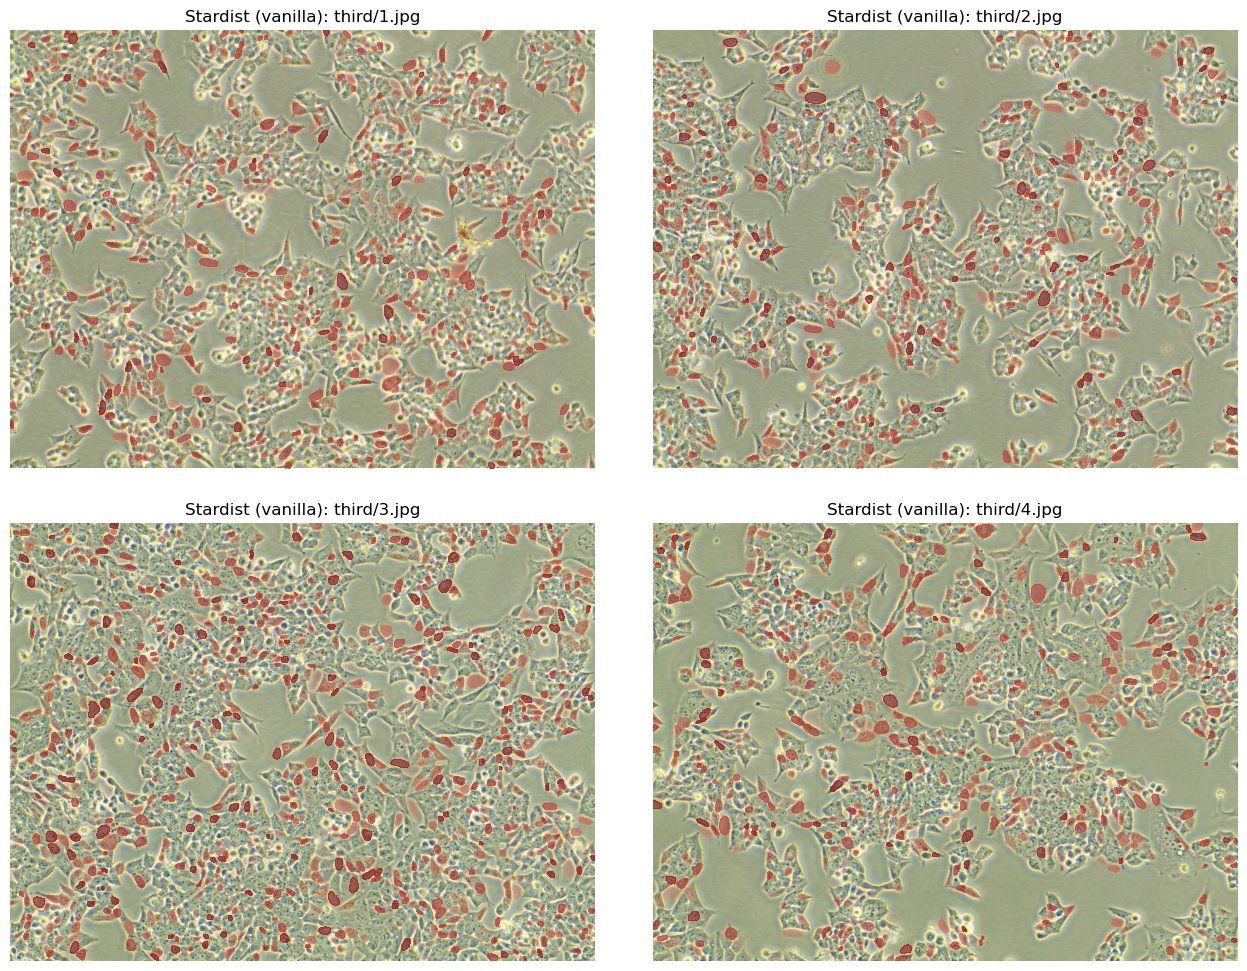

In [1]:
import sys, os; sys.path += [os.path.join(os.path.expanduser('~'), 'thesis')]  # NOTE hardcoded project root to find shared util modules
from stardist.models import StarDist2D
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

import skimage

from util.plot import *


model = StarDist2D.from_pretrained('2D_versatile_he')

images = [f'../data/third/{i}.jpg' for i in [1,2,3,4]]

fig, axs = plt.subplots(2, 2, figsize=(13, 10))
plt.tight_layout()

for ax, image, imgid in zip(axs.flat, images, [1,2,3,4]):
  image = skimage.io.imread(image)

  masks, _ = model.predict_instances(normalize(image))
  ax.set_title(f"Stardist (vanilla): third/{imgid}.jpg")

  plot_mask(masks, image, 'red', ax=ax);